# **Applied Data Science - Course Project No1 (Andreas Haile)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **A. An overview of the dataset**

#### **1. Import the data as a Pandas DataFrame and name it as `df`**

In [2]:
my_folder = "/Users/Andy/Documents/GitHub/project-adsml-ibex-c1-s1-5121-3258"
file_loc = my_folder+"/p1_communes.csv"

In [3]:
df = pd.read_csv('p1_communes.csv')

#### **2. Check the number of rows and columns**

There are several ways to check this :

In [4]:
len(df.index) # gives the number of rows (observations)

2202

In [5]:
len(df.columns) # gives the number of columns (variables)

17

In [6]:
df.shape # Gives directly the number of rows and columns

(2202, 17)

#### **3. Display the first few entries of the DataFrame**

In [7]:
df.head(5)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


#### **4. Obtain the index labels, and then show the column names as a `list`**

In [8]:
df.index

RangeIndex(start=0, stop=2202, step=1)

In [9]:
df.columns.to_list()

['Canton',
 'Commune',
 'Language',
 'Residents',
 'Population density per km²',
 '0-19 years',
 '20-64 years',
 '65 years or over',
 'Private households',
 'Surface area in km²',
 'Settlement area',
 'Agricultural area',
 'Wooded area',
 'Unproductive area',
 'East coordinate',
 'North coordinate',
 'Elevation']

#### **5. Check the data type for each column.**

In [10]:
df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

#### **6. Check if there are any missing values and show the rows that contain the missing values**

In [11]:
df.isnull().sum()

Canton                         3
Commune                        0
Language                      11
Residents                      0
Population density per km²     0
0-19 years                     0
20-64 years                    0
65 years or over               0
Private households             0
Surface area in km²            0
Settlement area                0
Agricultural area              0
Wooded area                    0
Unproductive area              0
East coordinate                0
North coordinate               0
Elevation                      0
dtype: int64

As we can see, there are 3 missing values in the "Canton" column and 11 in the "Language" column.

In [12]:
df[df["Canton"].isnull() | df["Language"]. isnull()]

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


Here we can see the rows containing one or more missing values.

#### **7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type**

In [13]:
df = df.dropna(axis = 0, how="any")

In [14]:
df.shape

(2191, 17)

We have now 2191 observations left, compared to 2202 in the original dataframe. We removed the 11 observations that were containing missing values.

In [15]:
df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

## **B. Exploration: numerical summaries, indexing and grouping**

#### **1. Obtain the _mean_, _minimum_ and _maximum_ value for each column containing numerical data. Your output should preferably show only the three requested statistics and not the full table of descriptive statistics**

In [16]:
df.describe().loc[['mean','min','max']].round(3).T

,mean,min,max
Residents,3865.300,11.000,415367.000
Population density per km²,433.424,0.895,12669.052
0-19 years,20.585,0.000,37.778
20-64 years,60.371,18.182,77.922
65 years or over,19.044,6.271,81.818
Private households,1702.485,10.000,201252.000
Surface area in km²,17.973,0.310,438.630
Settlement area,14.883,0.139,97.260
Agricultural area,45.930,0.000,91.509
Wooded area,32.576,0.000,88.235


#### **2. List the 10 most populated communes, ordered by their number of residents**

In [17]:
 df.sort_values(by="Population density per km²", ascending = False).head(10).sort_values(by="Residents", ascending = False)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2124,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
2131,GE,Lancy,fr,32851,6887.002096,23.637028,60.862683,15.500289,12898,4.77,88.016529,5.165289,6.404959,0.413223,2498100,1116300,400
2111,GE,Carouge (GE),fr,22458,8317.777778,20.950218,64.983525,14.066257,9440,2.70,84.905660,4.905660,8.679245,1.509434,2499700,1115600,383
1754,VD,Renens (VD),fr,20927,7093.898305,21.187939,64.309266,14.502795,9322,2.95,94.237288,3.389831,2.372881,0.000000,2534100,1154400,428
1915,VD,Vevey,fr,19891,8287.916667,20.360967,64.933890,14.705143,9505,2.40,89.873418,2.953586,4.641350,2.531646,2554400,1145700,395
2134,GE,Onex,fr,18964,6748.754448,21.883569,58.632145,19.484286,7667,2.82,77.304965,6.028369,13.120567,3.546099,2496500,1115500,417
1752,VD,Prilly,fr,12399,5635.909091,19.654811,62.021131,18.324058,6115,2.20,82.191781,10.958904,6.849315,0.000000,2536100,1154100,498
2116,GE,Chêne-Bourg,fr,8708,6803.125000,22.186495,61.736334,16.077170,3508,1.28,88.095238,8.730159,3.174603,0.000000,2504000,1116600,421
1586,TI,Massagno,it,6226,8413.513514,17.475104,60.889817,21.635079,3032,0.74,97.260274,0.000000,2.739726,0.000000,2716400,1096900,374


#### **3. List the 10 least populated communes, ordered by their number of residents**

In [18]:
df.sort_values(by="Population density per km²", ascending = False).tail(10).sort_values(by = "Residents", ascending = False)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1969,VS,Fieschertal,de,318,1.840171,20.125786,61.320755,18.553459,133,172.86,0.138897,2.367035,2.471208,95.022860,2654200,1141800,3080
408,BE,Guttannen,de,263,1.309435,15.589354,50.950570,33.460076,117,200.85,0.487951,3.813981,9.345748,86.352320,2665200,1167600,2446
1155,GR,Avers,de,168,1.804124,17.261905,55.357143,27.380952,75,93.12,0.472712,49.366137,6.027073,44.134078,2759300,1148900,2404
597,UR,Realp,de,153,1.965570,8.496732,56.862745,34.640523,77,77.88,0.796813,38.748233,3.110140,57.344814,2681500,1161400,2413
1533,TI,Bedretto,it,110,1.463155,6.363636,66.363636,27.272727,58,75.19,0.996943,24.564668,15.047189,59.391200,2682300,1151100,2244
1953,VS,Zwischbergen,de,77,0.895037,5.194805,77.922078,16.883117,43,86.03,0.372353,11.252036,28.717710,59.657901,2654200,1116200,2129
1164,GR,Ferrera,de,75,0.993904,8.000000,54.666667,37.333333,42,75.46,0.384411,24.774655,17.948038,56.892895,2753800,1154100,2301
1628,TI,Campo (Vallemaggia),it,53,1.223736,3.773585,60.377358,35.849057,33,43.31,0.806266,8.500346,50.011518,40.681871,2681400,1126900,1805
1627,TI,Bosco/Gurin,it,46,2.089959,8.695652,60.869565,30.434783,25,22.01,0.635786,24.386921,30.881017,44.096276,2681100,1130000,2019
1546,TI,Corippo,it,11,1.426719,0.000000,18.181818,81.818182,10,7.71,0.259740,3.506494,64.935065,31.298701,2708100,1121500,1134


#### **4. Group the communes by canton and save them into separate .csv files, e.g. a ZH.csv with all the data for communes in Zurich (Do not include the .csv files in your submission)**

In [19]:
df.Canton.unique()

array(['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO',
       'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD',
       'VS', 'NE', 'GE', 'JU'], dtype=object)

In [20]:
Canton_list = list(df.Canton.unique())
for canton in Canton_list: 
    cantonal_df = df[df["Canton"] == canton]
    filename = canton+".csv"
    cantonal_df.to_csv(filename, index = False)

#### **5. Compute the mean population density for each canton and rank the cantons from most dense to least dense**

In [21]:
df_grouped_density = df.groupby("Canton")["Population density per km²"].agg(lambda x: np.mean(x)).to_frame().sort_values(
                        by = "Population density per km²", ascending = False).round(2)
df_grouped_density.rename(columns={"Population density per km²": "Mean Population Density per km²"})

,Mean Population Density per km²
Canton,
BS,3236.63
GE,1802.56
ZH,814.01
ZG,709.80
TI,644.13
BL,565.74
SG,535.51
AG,509.43
VD,435.30


#### **6. Compute the number of communes in each canton where more than 50 percent of their populations are aged between 20 and 64 years old** 

In [22]:
df.loc[df["20-64 years"] > 50].groupby("Canton")["Commune"].count()

Canton
AG    210
AI      6
AR     20
BE    339
BL     86
BS      3
FR    131
GE     45
GL      3
GR    100
JU     53
LU     82
NE     30
NW     11
OW      7
SG     77
SH     26
SO    109
SZ     29
TG     80
TI    113
UR     20
VD    309
VS    124
ZG     11
ZH    158
Name: Commune, dtype: int64

First of all, we select from our `df` only the communes that have 50 percent or more of their population that are aged between 20 and 64 years old with `df.loc[df["20-64 years"] > 50]`. Then we just count how many communes we have per canton that satisfies this condition with `groupby("Canton")["Commune"].count()`.

#### **7. Compute the difference between the _maximum_ and _minimum_ elevations for each canton. Find the top 5 cantons that have the largest range of elevations ?**

In [23]:
list_diff_elev = []
Canton_list = list(df.Canton.unique())
for canton in Canton_list:
    df_canton = pd.read_csv(canton+".csv")
    list_diff_elev.append([canton, (df_canton.Elevation.max() - df_canton.Elevation.min())])
    df_diff_elev = pd.DataFrame(list_diff_elev, columns=["Canton", "Difference between Max and Min Elevation"])
df_diff_elev

,Canton,Difference between Max and Min Elevation
0,ZH,521
1,BE,2025
2,LU,944
3,UR,1871
4,SZ,1271
5,OW,501
6,NW,1010
7,GL,587
8,ZG,560
9,FR,988


In [24]:
df_diff_elev.sort_values(by = "Difference between Max and Min Elevation", ascending = False).head(5)

,Canton,Difference between Max and Min Elevation
22,VS,2610
20,TI,2044
1,BE,2025
17,GR,2017
3,UR,1871


## **C. Exploration: visualizations**

#### **1. Obtain a horizontal bar plot that shows the top 10 populated communes. Your bar chart should have the names of the communes listed vertically along the y-axis and the x-axis should show the populations**

In [25]:
df_top10populated = df.sort_values(by = "Residents", ascending = False).head(10)
df_top10populated

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
154,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.927040,201252,87.93,61.972472,10.101240,26.231373,1.694915,2683100,1247100,457
2124,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
1749,VD,Lausanne,fr,139111,3361.793137,19.569984,65.735995,14.694021,68940,41.38,44.694223,16.050278,39.062122,0.193377,2538200,1152400,667
194,BE,Bern,de,133883,2593.626501,16.693680,66.047220,17.259099,63414,51.62,45.030033,18.988568,33.617516,2.363883,2600100,1199700,556
141,ZH,Winterthur,de,111851,1643.176142,19.862138,63.889460,16.248402,50776,68.07,33.587786,24.823840,40.443335,1.145038,2697200,1261700,481
535,LU,Luzern,de,81691,2807.250859,16.127848,64.419581,19.452571,41139,29.10,47.815617,27.863777,22.325421,1.995184,2666200,1211800,490
1053,SG,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688
1582,TI,Lugano,it,63185,832.915898,17.450344,60.397246,22.152410,30755,75.93,18.662806,9.607792,66.122664,5.606739,2717100,1095900,789
207,BE,Biel/Bienne,de,55159,2603.067485,19.362207,62.337968,18.299824,26339,21.19,45.518868,7.877358,45.377358,1.226415,2585500,1221200,478


We are going to plot these 10 observations above; the top 10 populated communes.

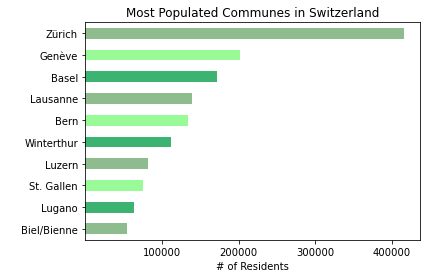

In [26]:
df_top10populated.plot.barh(x="Commune", y = "Residents", legend = None,
                           color = ["darkseagreen", "palegreen", "mediumseagreen",
                                    "darkseagreen", "palegreen", "mediumseagreen",
                                    "darkseagreen", "palegreen", "mediumseagreen",
                                    "darkseagreen"])

plt.xlabel("# of Residents")
plt.ylabel(" ")
plt.title("Most Populated Communes in Switzerland")
plt.xticks([100000, 200000, 300000,400000])
plt.gca().invert_yaxis();

#### **2. For the top 10 populated communes of the previous step, your task now is to plot a horizontal stacked bar chart that shows how their lands are divided into the 4 area types: _Settlement_, _Agricultural_, _Wooded_, _Unproductive_**

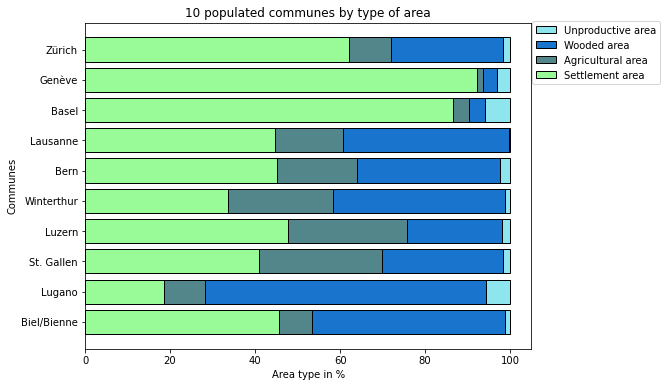

In [27]:
xc = df_top10populated['Commune']
y1 = df_top10populated['Settlement area']
y2 = df_top10populated['Agricultural area']
y3 = df_top10populated['Wooded area']
y4 = df_top10populated['Unproductive area']

xc = df_top10populated['Commune']
y1 = df_top10populated['Unproductive area']
y2 = df_top10populated['Wooded area']
y3 = df_top10populated['Agricultural area']
y4 = df_top10populated['Settlement area']

plt.figure(figsize=(8,6));

plt.barh(xc, y1, color='#8EE5EE', edgecolor='black', left=y2+y3+y4, label='Unproductive area')
plt.barh(xc, y2, color='#1874CD', edgecolor='black', left=y3+y4, label='Wooded area')
plt.barh(xc, y3, color='#53868B', edgecolor='black',left=y4, label='Agricultural area')
plt.barh(xc, y4, color='#98FB98', edgecolor='black', label='Settlement area')


plt.ylabel('Communes');
plt.xlabel("Area type in %");
plt.title("10 populated communes by type of area");
plt.xticks([0,20,40,60,80,100]); 
plt.legend(bbox_to_anchor = (1.3, 1.02));
plt.gca().invert_yaxis();

#### **3. We are interested in the number of communes and their proportions of young residents (0-19yrs). Your task is to obtain a histogram that shows the number of communes for which this proportion falls into the following intervals :**
- 5%-10%
- 10%-15%
- 15%-20%
- 20%-25%
- 25%-30%
- 30%-35%

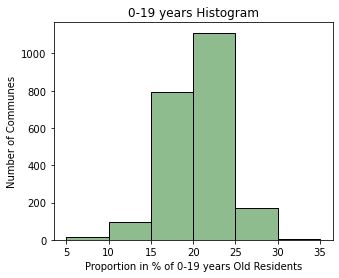

In [28]:
plt.figure(figsize=(5,4));
hist_YR = df['0-19 years'].plot.hist(bins=[5,10,15,20,25,30,35], color='darkseagreen', edgecolor='black');
hist_YR.set_xlabel('Proportion in % of 0-19 years Old Residents')
hist_YR.set_ylabel('Number of Communes')
hist_YR.set_title('0-19 years Histogram')
plt.show();

#### **4. Your task is to investigate the distributions of the age group 0-19 years, which is a numerical variable, across four language regions, which is a categorical variable**

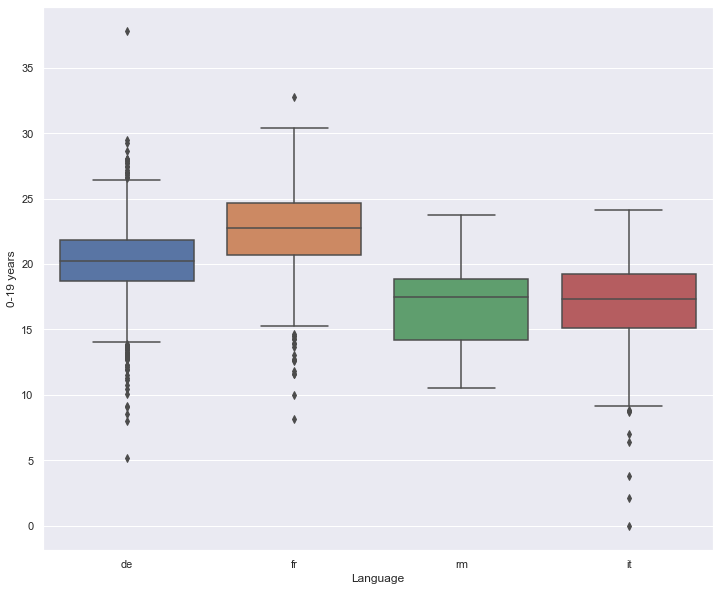

In [30]:
box19 = sns.boxplot(x="Language", y="0-19 years", data=df)
sns.set(rc={'figure.figsize':(12,10)})

It is in the french speaking part of Switzerland that the 0-19 years old residents are represented the most.

#### **5. Your task is to do the previous task for the three age groups 0-19 years, 20-64 years and 65 years or over. In order to make the comparison easy, you should make a plot with one subplot per age group (plot with 1 row and 3 columns). Ensure that the subplots have appropriate titles, legends, and labels. Also, ensure that they have proper sizes and there is enough space between them**

- The y-axis of the subplot should show the percentages of the populations for age groups, ranging from 0 to 80%
- Optional: add the observations into your subplot to see how they form the distributions. For instance, if you chose the box plot, you can draw a strip plot on the same axis as a complement to the box plot

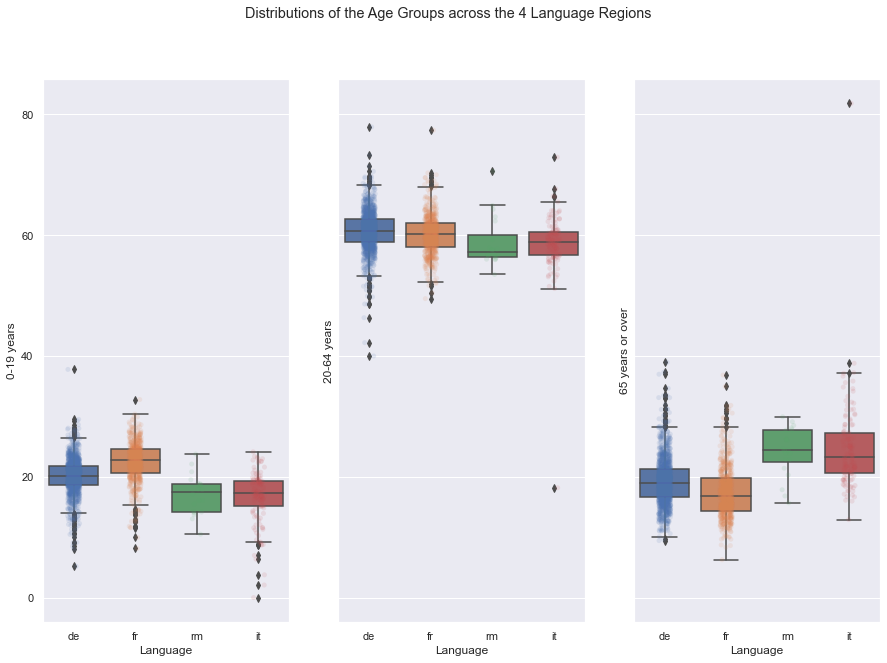

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, sharey = True)
sns.set(rc={'figure.figsize':(15,10)})
fig.suptitle("Distributions of the Age Groups across the 4 Language Regions");

sns.boxplot(ax=axes[0], data=df, x= "Language", y= "0-19 years")
sns.stripplot(ax=axes[0], data=df, x= "Language", y= "0-19 years", alpha = 0.12)

sns.boxplot(ax=axes[1], data=df, x= "Language", y= "20-64 years")
sns.stripplot(ax=axes[1], data=df, x= "Language", y= "20-64 years", alpha = 0.12)


sns.boxplot(ax=axes[2], data=df, x= "Language", y= "65 years or over")
sns.stripplot(ax=axes[2], data=df, x= "Language", y= "65 years or over", alpha = 0.12);

#### **6. Your task is to use the pairplot from Seaborn and produce 3 plots to visually investigate the relation between the Agricultural area of communes and their Settlement area, Wooded area and the Unproductive area**

A) Use the Elevation as the color-code variable in the plot and show that communes that are located in high altitudes have very low Settlement and Agricultural areas, but have a lot of Unproductive areas. 

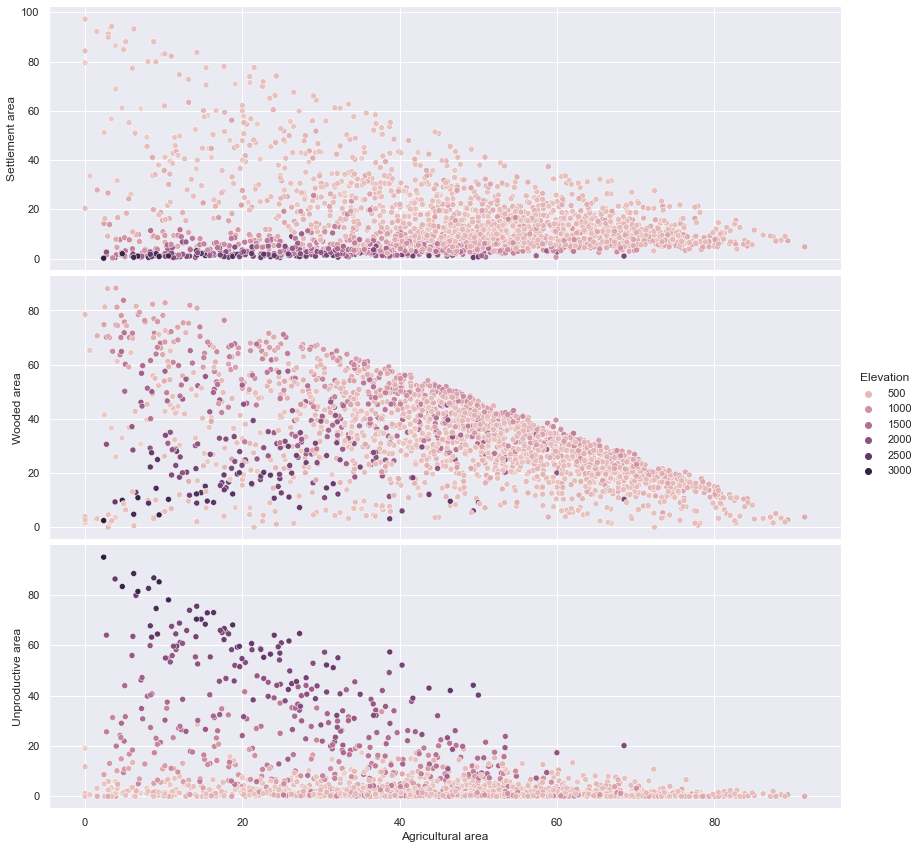

In [33]:
sns.pairplot(data = df, x_vars = ['Agricultural area'], y_vars = ['Settlement area','Wooded area', 'Unproductive area'], 
             hue = "Elevation", height = 4, aspect = 3);

B) Are the relations linear?

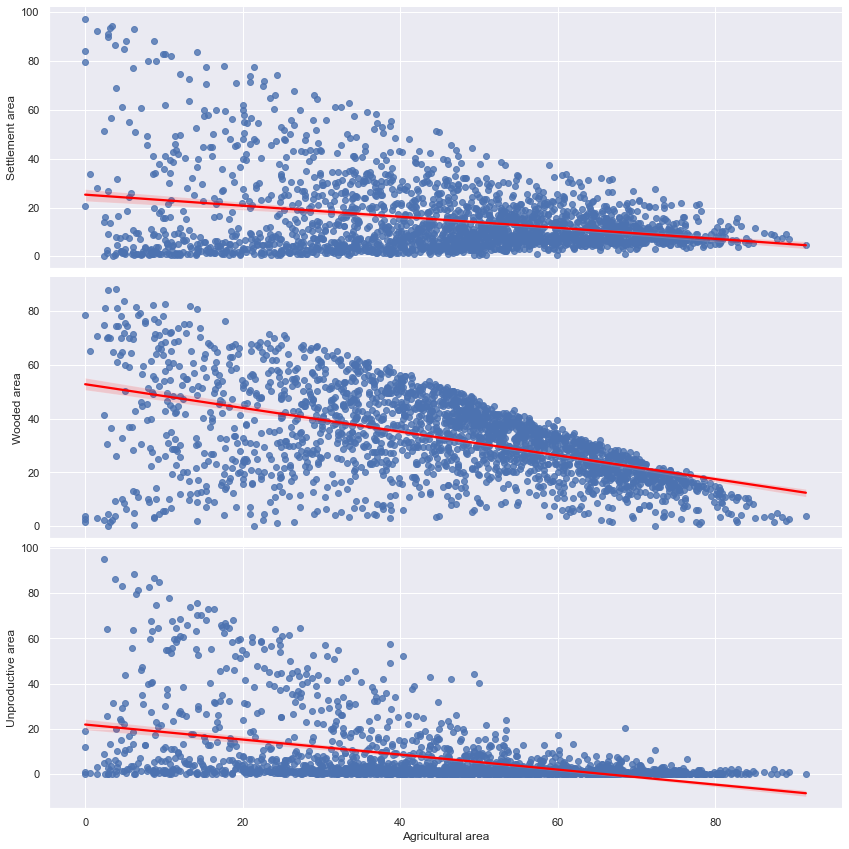

In [35]:
sns.pairplot(data = df, x_vars = ['Agricultural area'], y_vars = ['Settlement area','Wooded area','Unproductive area'], 
             kind = "reg", plot_kws={'line_kws':{'color':'red'}}, height = 4, aspect = 3);

The red line is the regression line between our variables taken pairwise (e.g. Unproductive area and Agricultural area). On each of these graphics, the slope is negative (= the correlation is negative). It means that when the values of Agricultural area increase, the values of the other variables tend to decrease. In other words, when the Agricultural areas occupy more space, the other types of area occupy less space.

#### **7. Your task is to draw a map of Switzerland using the East and North coordinates of communes**

A) Use the Elevation as the color-code variable in the plot so that the you can see the three geographic regions, namely the Swiss Alps, the Central Plateau and the Jura

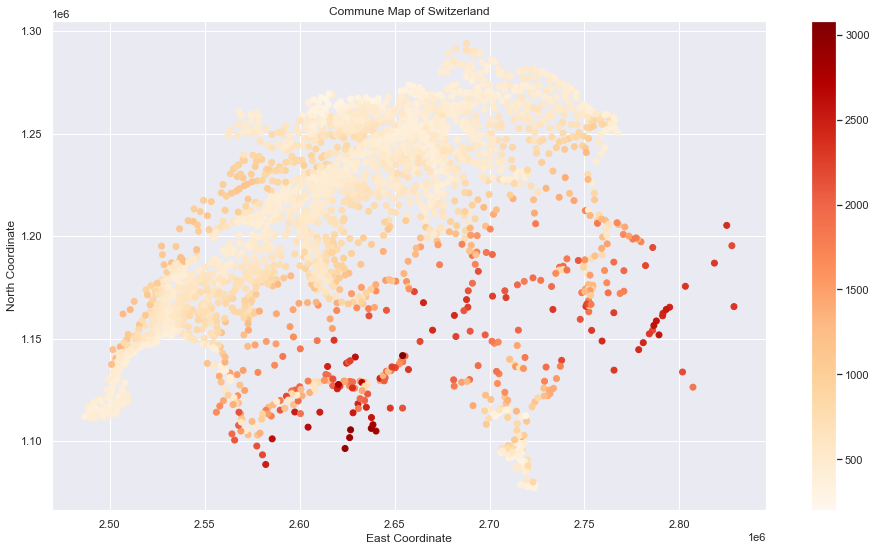

In [37]:
plt.scatter(x = "East coordinate", y = "North coordinate", cmap="OrRd",c = "Elevation",data = df)
plt.rcParams["figure.figsize"] = [16, 9]

plt.title("Commune Map of Switzerland")
plt.xlabel("East Coordinate") 
plt.ylabel("North Coordinate")
plt.colorbar()

plt.show();

B) Re-do the same plot but this time with the Language as the color-code variable

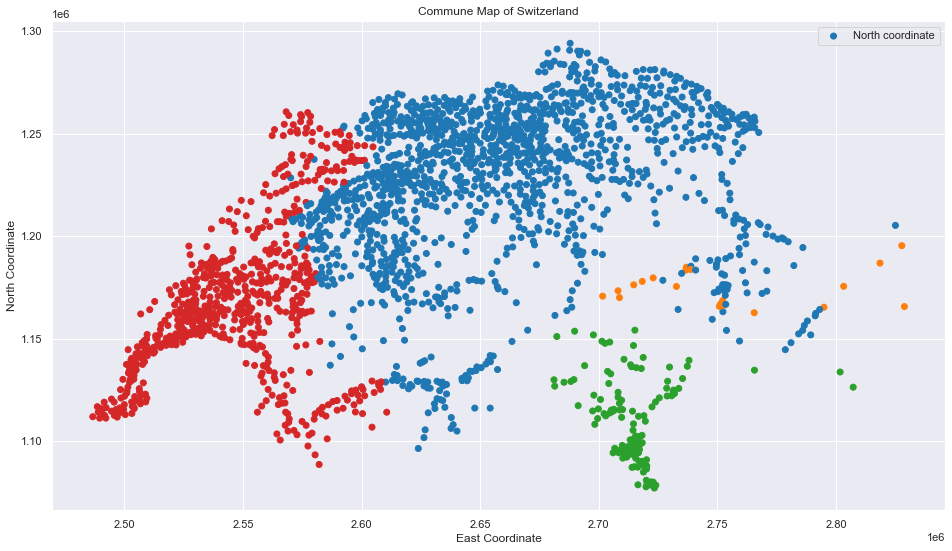

In [38]:
colors = {'de':'tab:blue', 'rm':'tab:orange', 'it':'tab:green', 'fr':'tab:red'}

plt.scatter(x = "East coordinate", y = "North coordinate",c = df["Language"].map(colors), data = df)
plt.rcParams["figure.figsize"] = [12, 8]


plt.title("Commune Map of Switzerland")
plt.xlabel("East Coordinate") 
plt.ylabel("North Coordinate") 
plt.legend()
plt.show()

#### **8. Your task is to obtain the two plots from the previous task as subplots (with 1 row and 2 columns)**

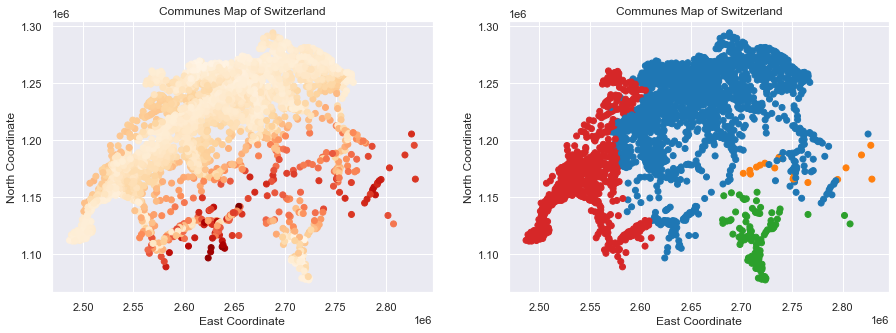

In [39]:
fig, axes = plt.subplots(nrows = 1,  # sets the number of rows in the subplot grid
                         ncols = 2,  # sets the number of columns in the subplot grid
                         figsize = (15, 5)) # sets the width and height of the figure (in inches)


# Plot coordinates points with Elevation as color-code
axes[0].scatter(x = "East coordinate", y = "North coordinate", cmap="OrRd",c = "Elevation",data = df)
axes[0].set_title("Communes Map of Switzerland")
axes[0].set_xlabel("East Coordinate") 
axes[0].set_ylabel("North Coordinate")

# Plot coordinates points with Language as the color-code
colors = {'de':'tab:blue', 'rm':'tab:orange', 'it':'tab:green', 'fr':'tab:red'}
axes[1].scatter(x = "East coordinate", y = "North coordinate",c = df["Language"].map(colors), data = df)
axes[1].set_title("Communes Map of Switzerland")
axes[1].set_xlabel("East Coordinate") 
axes[1].set_ylabel("North Coordinate") 

plt.show()

## **D. Probabilities**

#### **Compute the probability that a randomly selected commune with elevation over 2000 is from the canton of Valais**

In [40]:
df["Commune"][df["Elevation"] > 2000].count()

96

In [41]:
df["Canton"][(df["Canton"] == "VS") & (df["Elevation"] > 2000)].count()

49

In [42]:
df["Canton"][(df["Canton"] == "VS") & (df["Elevation"] > 2000)].count()/df["Commune"][df["Elevation"] > 2000].count()

0.5104166666666666

## **E. Matrices**

#### **Define a data frame matrix whose rows correspond to communes and the columns to the cantons. Fill in the matrix with 0/1 values where entry _(i,j)_ is a 1 if the commune in row _i_ is in the canton in column _j_ and a 0 otherwise**

In [43]:
df_crosstab = pd.crosstab(df["Commune"], df["Canton"])
df_crosstab

Canton,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Commune,,,,,,,,,,,,,,,,,,,,,
Aadorf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Aarau,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarberg,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarburg,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarwangen,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zwieselberg,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zwingen,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zwischbergen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
